# 

# Linear Algebra for Electrical Systems
## 2021-fall (430.216, Instructor: prof. Young Min Kim)
## TAs: Cheol-Hui Min and Junho Lee
## ta.linear.2020@gmail.com (yes it is 2020)

## HW1: Implementing K means ++ Alogrithm and testing on computer vision applications.

---

- In this homework, you will be asked to implement [K-means ++](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)
algorithm using some basic linear algebraic operations using [Numpy](https://numpy.org/doc/stable/reference/) library.


- The goal of this HW is to get familiar with basic linear algebraic operations we learned so far for this course. Thus, 
you have to focus on finding appropriate Numpy operations and combining them to implement the mathematical logic of *K-means ++*.  

- This HW consists of 3 problems.
    - Problem 1. Implementing and evaluating the very basic *K-means* algorithm (* points)
    - Problem 2. Scaling up *K-means* by applying *K-means ++* (* points)
    - Problem 3. Applying *K-means ++* on computer vision applications (* points)


- Please fill out all the `Problem #K. fill out here.` annotated parts.

- You should **NOT** use methods under `np.linalg` API. Please use generic `numpy` methods.


In [ ]:
# Import necessary modules 
import numpy as np
import matplotlib.pyplot as plt

## Problem 1. Implementing and evaluating the very basic *K-means* algorithm (* points)
---
### Clustering
- Suppose we have $N$ (the number of total vectors/data) $n$ (the dimension of each vector/data), $\mathbf{x}_1, ..., \mathbf{x}_N$.
- Goal of clustering is to group the vectors into $k$ clusters. (Normally, $k \ll N$)

*Suppose we have the following data, with $N=300$, $2-$vectors*

In [ ]:
# define simple data points (vectors)
X = np.concatenate(
    [[.3*np.random.randn(2) for i in range(100)], # N1=100 2-dim vectors, Normal distribution centered @ (0, 0), scaled by 0.3 
     [np.array([1,1]) + .3*np.random.randn(2) for i in range(100)], # N2=100 2-dim vectors, Normal distribution centered @ (1, 1), scaled by 0.3
     [np.array([1,-1]) + .3*np.random.randn(2) for i in range(100)]] # N3=100 2-dim vectors, Normal distribution centered @ (1, -1), scaled by 0.3
, axis=0) # We concatenate(merge) N1,N2, N3 vectors (each has shape (100, 2)) into (300, 2); since
X.shape # (300, 2) = (N, n) 

(300, 2)

((-1.5, 2.5), (-2.0, 2.0))

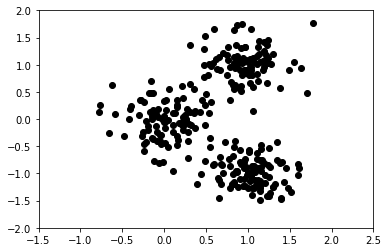

In [ ]:
plt.scatter([x[0] for x in X],[x[1] for x in X], color='k') # scatter each dimension of data vector for each X, Y axis
plt.xlim([-1.5,2.5]),plt.ylim([-2,2]) # for the concise visualization

*By our intuition, we can expect there are $k=3$ clusters.
Thus, in our imagination, the clusters may look like...*

((-1.5, 2.5), (-2.0, 2.0))

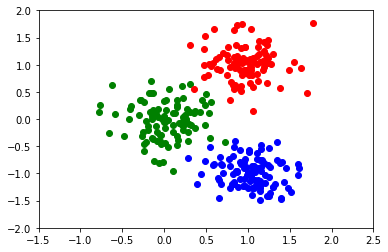

In [ ]:
plt.scatter([x[0] for x in X[:100]],[x[1] for x in X[:100]], color='g') # first cluster as green
plt.scatter([x[0] for x in X[100:200]],[x[1] for x in X[100:200]], color='r') # second cluster as red
plt.scatter([x[0] for x in X[200:300]],[x[1] for x in X[200:300]], color='b') # third cluster as blue
plt.xlim([-1.5,2.5]),plt.ylim([-2,2]) # for the concise visualization

*Now let's implement the K-means algorithm by our hand and see if it clusters the data just like our intuition.*

<!-- *In this homework, you will be asked to* (The notation follows that in the textbook and the course note) 
- First test your vanilla $K$-means algorithm on the dataset above
- Then, change the distance metric in clustering objective from *Frobenius norm* $\lVert \mathbf{x_i} - \mathbf{z_{c_i}} \rVert_2$ to
**angle between two vectors**, i.e., $\arccos(\frac{\mathbf{x_i} \cdot \mathbf{z_{c_i}}}{\lVert\mathbf{x_i}\rVert_2 \lVert\mathbf{z_{c_i}}\rVert_2} )$
- Finally, test your algorithm on the well-renowned MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database). -->

*From the lecture, we studied the pseudo-code for the actual implementation of $K$ means as follows.*

### *pseudo-code* for $K$-Means clustering
___

Given a list of $N$ vectors $\mathbf{x_1}, ..., \mathbf{x}_N$, and an initial list of $k$ groups representative
vectors $\mathbf{z}_1, ..., \mathbf{z}_k$.

**Arbitrarily choose an initial $k$ group representatives.**

If the vectors (data points) and the group representatives are defined,


Repeat until covergence

1. Partition the vectors into k groups. For each vector $i = 1, ..., N,$ assign $\mathbf{x}_i$ to the 
    group associated with the nearest representative.
2. Update representatives. For each group $j = 1, ..., k,$ set $\mathbf{z}_j$ to be the mean of the
    vectors in group $j$.
___

### Below is the Python skeletal code we provide, based on the pseudo-code above

In [ ]:
MAX_ITERS = 100
TOLERANCE = 1e-4

def plt_dynamic(x, y, ax, colors=['b']):
    for color in colors:
        ax.plot(x, y, color)

# define distance metrics
def norm(v):
    
    D = v.ndim

    if D == 1:
      sumOfSquare = 0
      for i in v:
        sumOfSquare += i ** 2
      return np.sqrt(sumOfSquare)
    
    elif D == 2:
      lst = []
      for i in v:
        lst.append(norm(v))
      return np.array([lst])

def norm_einsum(v):
    """
        Compute the 2-norm of given vector using Einstein summation notation.
        Please refer to https://numpy.org/doc/stable/reference/generated/numpy.einsum.html

        Input:
            a batch of vector of any dimension [N, D] or [N] where N is a batch size. 
        Return:
            a reduced vector or scalar of shape [N] or [] (scalar)
    """
    return np.einsum('ij,ij->i', v, v)

def squared_norm(v):
    
    D = v.ndim

    if D == 1:
      sumOfSquare = 0
      for i in v:
        sumOfSquare += i ** 2
      return sumOfSquare
    
    elif D == 2:
      lst = []
      for i in v:
        lst.append(squared_norm(i))
      return np.concatenate([lst])


def dist_btwn_diff_shp(x, y):
    
    # you can utilize squared_norm() method we implemented.
    xx =  squared_norm(x).reshape(len(x), 1) # shape: [N, 1]

    # you can consider np.matmul() or '@' operator.
    xy = x @ y.T # shape: [N, D] @ [D, K] -> [N, K]

    yy = squared_norm(y).T # shape: [1, K], for broadcasting purpose


    return  np.sqrt(xx - 2 * xy + yy) # shape: [N, K]

def sqrd_dist_btwn_diff_shp(x, y):
    
    # you can utilize squared_norm() method we implemented.
    xx =  squared_norm(x).reshape(len(x), 1) # shape: [N, 1]

    # you can consider np.matmul() or '@' operator.
    xy = x @ y.T # shape: [N, D] @ [D, K] -> [N, K]

    yy = squared_norm(y).T # shape: [1, K], for broadcasting purpose


    return  xx - 2 * xy + yy # shape: [N, K]

def kmeans_pp(X, K):
    """
        Implementation of K-means ++ initialization.

        Input:
            X: datapoints of shape [N, D]. If the data is multi-dimensional, 
                reshaped form into [N, D] of them is desired.
            K: the number of groups.
        Return:
            reps: Array containing the initialized K representatives of shape [K, D]
            rep_idxs:
    """
    # you should be familiar with checking the shape of an array.
    # also refer to python unpacking. https://nerd-mix.tistory.com/58
    N, D = X.shape

    # create an empty numpy array of shape (K, D) to store the representative data points.
    reps = np.zeros(shape=(K, D))

    # randomly sample the first index of representative among N data.
    # please refer to numpy.random API.
    first_rep_id = np.random.choice(N, 1)

    # create an place holder for indices of representative data points
    rep_idxs = np.zeros(shape=(K))

    # register the first representative point to the first element of 'reps'.
    reps[0] = X[first_rep_id]

    # register the first index of representative point to the first element of 'reps'.
    rep_idxs[0] = first_rep_id

    # compute the distances between the first element of 'reps' and all data points 'X'.
    # to match the shape of the two arrays, you can consider using np.newaxis.
    # It is computing the D(x)^2 in pseudocode 1b. of K-means++.
    sqrd_dist_to_rep = squared_norm((np.array(reps[0]) - X)) # shape [N,]. D(x)^2

    # Sum of D(x)^2 for all data X. Refer to pseudocode 1b. of K-means++ 
    sum_sqrd_dist_to_rep = np.sum(sqrd_dist_to_rep)
    print(rep_idxs[0])

    # iterate to find the subsequent remaining K-1 group representatives. Index starts from 1.
    for k in range(1, K):

        # Choose group representatives by sampling with probability proportional 
        # to the squared distance to the closest existing representative
        # set sampling interval (0, sum of squared distances)
        rand_val = sum_sqrd_dist_to_rep * np.random.random_sample()

        # find the id of new representative among the data points. -> random sample
        rep_id = np.searchsorted(np.cumsum(sqrd_dist_to_rep, dtype=np.float64), rand_val)
        rep_id = np.clip(rep_id, None, N - 1)


        # add the new representatives and their indices.
        reps[k] = X[rep_id]
        rep_idxs[k] = rep_id


        # compute distances to the new representative.
        # sqrd_dist_to_rep = np.array([np.min(v)**2 for v in dist_btwn_diff_shp(np.concatenate([reps[0:k], np.array([X[rep_id]])]), X).T])
        sqrd_dist_to_rep = np.array([np.min(v) for v in sqrd_dist_btwn_diff_shp(np.concatenate([reps[0:k], np.array([X[rep_id]])]), X).T])

        # update sum_sqrd_dist_to_reps
        sum_sqrd_dist_to_rep = np.sum(sqrd_dist_to_rep)

        print(rep_idxs[k])

    return reps, rep_idxs


# define our kmeans cluster function
def kmeans(X, num_groups, initialize='random', draw_plot=True):
    # you should be familiar with checking the shape of an array.
    # also refer to python unpacking. https://nerd-mix.tistory.com/58
    N, D = X.shape
    K = num_groups 

    print (f"Total number of datapoints is {N}")
    print (f"Dimension of each data is {D}")
    print (f"Number of clustering groups is {K}")

    distances = np.zeros(N) # stores distances of each point to the nearest representative
    costs = [] # for the visualization of cost function
    iters = [] # for the visualization of cost function
    jPrev = np.Inf # placeholders for ending condition; if prev J and current J haven't changed much, finish
    
    if initialize == "random": # basic K-means
        rep_idx = np.random.permutation(N)[:K]
        reps = X[rep_idx]
    elif initialize == "kmeans++": # K-means ++
        reps, rep_idx = kmeans_pp(X , K)

    print("Initial reps from kmeans++")
    print(rep_idx)
    print("==========================================")
    # precompute squared norms of data points 

    # actual K-means algorithm
    itr_last = 0
    for itr in range(MAX_ITERS):
        # loop over k representatives
        if itr > 0: # update the representatives after first iteration.
            # update representatives as a mean of datapoints of each cluster.
            # please refer to Python's list comprehension.
            # consider using np.where(condition), which returns an array of indices that satisfies 'condition'.
            reps = np.array([np.mean(X[np.where(group_assign == k)], axis = 0) for k in range(0, len(rep_idx))])
        # for each iteration, compute the distance between 

        # masks the numerical stability.
        mask = np.ones(N, dtype=bool)
        if initialize == "kmeans++" and itr == 0:
            for i in rep_idx:
                mask[int(i)] = False

        dist_to_reps = dist_btwn_diff_shp(X[mask], reps) # [N, K]
        # distances to neareast neighbors. consider using one of numpy min, amin, argmin
        dist_to_closest_rep = np.array([np.min(i) for i in dist_to_reps])

        if np.isnan(dist_to_closest_rep).any() and initialize == "kmeans++":
            raise ValueError("NaN has been yielded due to numerical instability for this run. \
            This is due to the lack of intricacy in implementing the kmeans++ seeding with numpy. \
            Please use another seed that you can find it working. Sorry for that! - TAs.")

        # assign the datapoints to each group. consider using one of numpy min, amin, argmin
        group_assign = np.array([np.argmin(v) for v in dist_to_reps])

        # print(group_assign.max(), group_assign.min())
        J = squared_norm(dist_to_closest_rep) / N
        if np.isnan(J) or np.isinf(J):
            raise ValueError("Loss is Nan or Inf! Stopping the iteration...")
        costs.append(J)
        iters.append(itr)

        # let's make log
        if itr < 10:
            print("Iteration " + str(itr) + ": Jclust = " + str(J)+".")
        elif itr >= 10 and itr % 10 == 0:
            print("Iteration " + str(itr) + ": Jclust = " + str(J)+".")

        # if error criterion satisfied, let's get out of the loop.
        if (itr > 1) and (abs(J - jPrev)) < (TOLERANCE * J):
            itr_last = itr
            break

        # if we couldn't satisfy the criterion before the max iterations.
        if itr == MAX_ITERS - 1:
            itr_last = itr
            print("Reached max iteration, but could not satisfy the tolerance.")
        jPrev = J
    print(f"Last iteration is {itr_last}")
    if draw_plot:
    # if itr % 5 == 0:
        fig, ax = plt.subplots(1,1)
        ax.set_title('K-Means cost over interations')
        ax.set_xlabel('Iterations') ; ax.set_ylabel('Cost')
        ax.set_xlim(0, itr_last) ; ax.set_ylim(0, np.max(costs))
        plt_dynamic(iters, costs, ax, 'ro')
    
    return group_assign, reps

### For the Problem 1, you need to implement `norm(), squared_norm(), dist_btwn_diff_shp(), kmeans()` methods in the above code block.
### CAVEAT: *Skeleton code incudes a usage of Python's list comprehension (LC).*
You should get familar with this concept to understand the skeletal code and utilize afterwards.
<br>
Please refer to this [LINK](https://docs.python.org/3/tutorial/datastructures.html) if you're not familiar with the LC.


*Now, let's test our algorithms. First assume there exist two representatives, i.e. $k=2$.
<br>
We also set the `initialize` as `'random'` to run the basic **k-means** algorithm.*

Total number of datapoints is 300
Dimension of each data is 2
Number of clustering groups is 2
Initial reps from kmeans++
[247 221]
Iteration 0: Jclust = 1.3729450672024353.
Iteration 1: Jclust = 0.7913686432032994.
Iteration 2: Jclust = 0.5926842996977706.
Iteration 3: Jclust = 0.4781128598806749.
Iteration 4: Jclust = 0.4764513329669654.
Iteration 5: Jclust = 0.47595949415189076.
Iteration 6: Jclust = 0.4759065184240514.
Iteration 7: Jclust = 0.4759065184240514.
Last iteration is 7


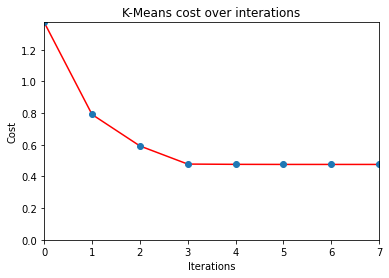

In [ ]:
num_groups = 2

# call the kmeans() function by parsing our toy data 'X', the # of clusters 'num_groups',)
assignments, representatives = kmeans(X, num_groups, 'random', True)


*You should observe some cost curve decreasing over the iterations. Now let's visualize the clustered data points.*

[[ 0.55852798 -0.58483175]
 [ 0.84972308  0.94507504]]


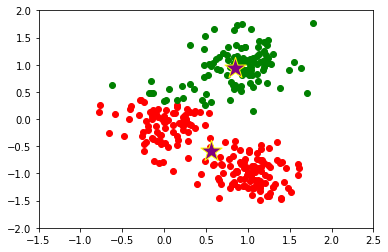

In [ ]:
# groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
# the same expression is 
groups = [] # list for the whole groups of length k
# iterate over representatives
for j in range(num_groups):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignments)):
        if assignments[i] == j:
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

print(representatives)

plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([r[0] for r in representatives], [r[1] for r in representatives], marker='*', color='purple', s=500, edgecolors='yellow')
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*You may find that our data points are somehow clustered into two groups.
<br>
Now, what happens if we assume there are three representatives? i.e. $k=3$*

Total number of datapoints is 300
Dimension of each data is 2
Number of clustering groups is 3
Initial reps from kmeans++
[  5 239 155]
Iteration 0: Jclust = 0.22567972238528752.
Iteration 1: Jclust = 0.16618209137705225.
Iteration 2: Jclust = 0.16618209137705225.
Last iteration is 2


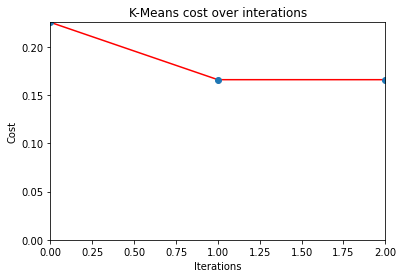

In [ ]:
num_groups = 3
assignments, representatives = kmeans(X, num_groups, 'random', True)

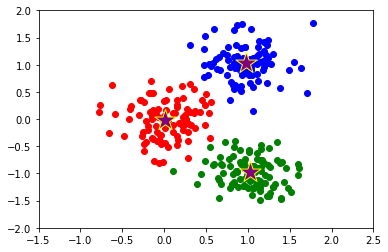

In [ ]:
# groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
# the same expression is 
groups = [] # list for the whole groups of length k
# iterate over representatives
for j in range(num_groups):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignments)):
        if assignments[i] == j:
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]], color='b') # plot the data poiints in green color for k=1
plt.scatter([r[0] for r in representatives], [r[1] for r in representatives], marker='*', color='purple', s=500, edgecolors='yellow')
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*You can also find that our $K$-means algorithms can find neat cluster points which are visualized as stars.*
<br>
<br>
<br>

## Problem 2. Improving *$K$-means* algorithm with *$K$-means++* initialization. (* points)
---
Now that we have tested our basic *$K$-means* algorithm, let's improve its performance with *$K$-means++* initialization.
The full paper of it can be found [HERE](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf).
<br>
The goal of *$K$-means++* is finding better initial guess for $K$ group representatives than the brute random guess.
<br>
<br>
**The pseudocode you should refer to can be summarized as below.**

![K-means++](imgs/hw02_kmeans++_description.png "Title")

### For the implementation, you just need to fill up the `kmeans_pp()` function and set the `initialize` argument of `kmeans()` as `'kmeans++'` function when calling it.






*If you are done, let's test our $K$ means++ for our previous datapoints.*

Total number of datapoints is 300
Dimension of each data is 2
Number of clustering groups is 3
145.0
269.0
98.0
Initial reps from kmeans++
[145. 269.  98.]
Iteration 0: Jclust = 0.3630313926525734.
Iteration 1: Jclust = 0.16745935607953136.
Iteration 2: Jclust = 0.16622148190199848.
Iteration 3: Jclust = 0.16618209137705225.
Iteration 4: Jclust = 0.16618209137705225.
Last iteration is 4


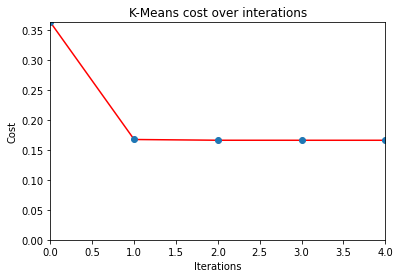

In [ ]:
num_groups = 3
assignments, representatives = kmeans(X, num_groups, 'kmeans++', True)


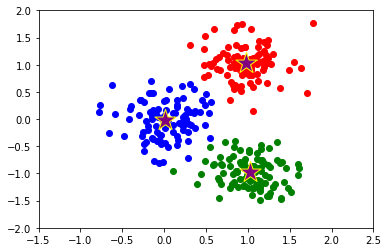

In [ ]:
# groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
# the same expression is 
groups = [] # list for the whole groups of length k
# iterate over representatives
for j in range(num_groups):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignments)):
        if assignments[i] == j:
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]], color='b') # plot the data poiints in green color for k=1
plt.scatter([r[0] for r in representatives], [r[1] for r in representatives], marker='*', color='purple', s=500, edgecolors='yellow')
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*We can see there is not much difference between the basic one and $k$-means ++.
<br>
To see much power of $K$-means++, let's test both method on more challenging clustering problem!*

## Problem 3. Finding the benefits of $k$ means++ by testing on challenging dataset. (* points)
---

- You might have heard about MNIST if you have an interest for the machine learning
- What's MNIST? : https://en.wikipedia.org/wiki/MNIST_database
- You (hopefully) can download the dataset directly from the Colab or Jupyternote book session by running the code block
If it doesn't work, please let us know via eTL's Q&A board.


*Now, let's prepare our MNIST dataset directly online.*

In [ ]:
# NOTE: In case the Tensorflow is not installed in your system, please uncomment the line below.
# NOTE: those who're working in the Colab may be already equipped with Tensorflow.
! pip install tensorflow==2.0.0
import tensorflow as tf
# Import tensorflow's MNIST data handle
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz') # mnist contains the numpy array of mnist dataset
# https://www.tensorflow.org/ap_docs/python/tf/keras/datasets/mnist/load_data

     |████████████████████████████████| 86.3 MB 12 kB/s 
     |████████████████████████████████| 449 kB 67.5 MB/s 
     |████████████████████████████████| 3.8 MB 36.2 MB/s 
     |████████████████████████████████| 50 kB 2.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=3ecdbd93c44c18d08d465ceec0c1a997662151f30c3163cce36b5013a6b44aad
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

*The variable 'mnist' is a dataset of 60,000 28X28 grayscale images of 10 digits, along with a test set of 10,000 images.*

*Its  data type is nested image & label tuples of train & test tuples of Numpy arrays:*

        tuple(
                tuple(x_train, y_train), 
                tuple(x_test, y_test),
        )



*In this assignment, we'll just use the **x_test** which consists of 10,000 grayscale images.
<br>
Also, as the experiments of section 4.4.1 of the textbook say,
<br>
we will cluster the data into $k=20$ clusters, i.e. set $k=20$ representatives.*


In [ ]:
(_, _), (X2, _) = mnist # In convention, we set the variable as '_' in case we won't use it.
B, H, W = 10000, 28, 28 # (B=10000, H=28, W=28), NOTE: X is an numpy array
X2 = np.array([i.flatten() for i in X2]) / 255.0 # represent each image is 784-dim vector. (10000, 784) 

### CAVEAT: Since we're dealing with tremendous number of samples, the optimization loop will take some time.

*Let's first test on MNIST dataset with random initialization.*

In [ ]:
num_groups = 20
np.random.seed(seed=18855)

assignments, representatives = kmeans(X2, num_groups, 'random', True)

Total number of datapoints is 10000
Dimension of each data is 784
Number of clustering groups is 20
Initial reps from kmeans++
[1206 3747 2483 3112 7805 4528 9470 4736 9272 2807 8724 9726 2360 3876
 2893 9931 8331 4541 5072 1169]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


ValueError: ignored

*The cost diverges. This is due to poor initialization  of $K$ representatives.
Then how about $K$ means++?*

Total number of datapoints is 10000
Dimension of each data is 784
Number of clustering groups is 20
9894.0
9108.0
5719.0
9598.0
1317.0
9549.0
7982.0
5018.0
9635.0
8110.0
2670.0
8562.0
4082.0
2742.0
9365.0
9164.0
8578.0
8332.0
6518.0
7052.0
Initial reps from kmeans++
[9894. 9108. 5719. 9598. 1317. 9549. 7982. 5018. 9635. 8110. 2670. 8562.
 4082. 2742. 9365. 9164. 8578. 8332. 6518. 7052.]
Iteration 0: Jclust = 60.850942257593374.
Iteration 1: Jclust = 47.96186537178249.
Iteration 2: Jclust = 37.35581103329261.
Iteration 3: Jclust = 36.340073537024644.
Iteration 4: Jclust = 35.91595035872006.
Iteration 5: Jclust = 35.645529490277646.
Iteration 6: Jclust = 35.44114904133714.
Iteration 7: Jclust = 35.287013422141605.
Iteration 8: Jclust = 35.17849618478009.
Iteration 9: Jclust = 35.10595628747346.
Iteration 10: Jclust = 35.048504826996684.
Iteration 20: Jclust = 34.88979493615762.
Last iteration is 21


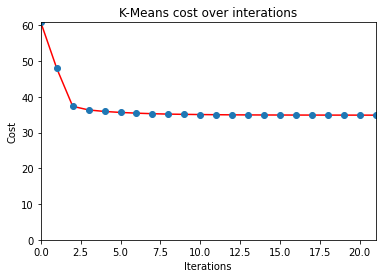

In [ ]:
num_groups = 20

np.random.seed(seed=19000)
assignments, representatives = kmeans(X2, num_groups, 'kmeans++', True)

*You may see the cost decreasing over iterations, where the number of iterations is lager than our previous experiments.*

### Visualize the $k=20$ representative samples. 
*Now, let's visualize the representative samples!*

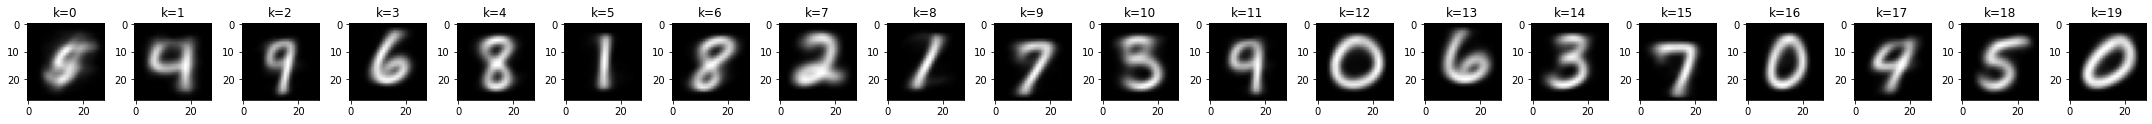

In [ ]:
num_samples = num_groups
num_col = num_groups
num_row = 1

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_samples):
    # ax = axes[i//num_col, i%num_col]
    ax = axes[i]
    ax.imshow(representatives[i].reshape(28, 28), cmap='gray')
    ax.set_title('k={}'.format(i))
plt.tight_layout()
plt.show()


*Wow, the representative samples look like the real hand-written data.
Then, let's check some samples for each representative $k$, if they look similar to each representative.*

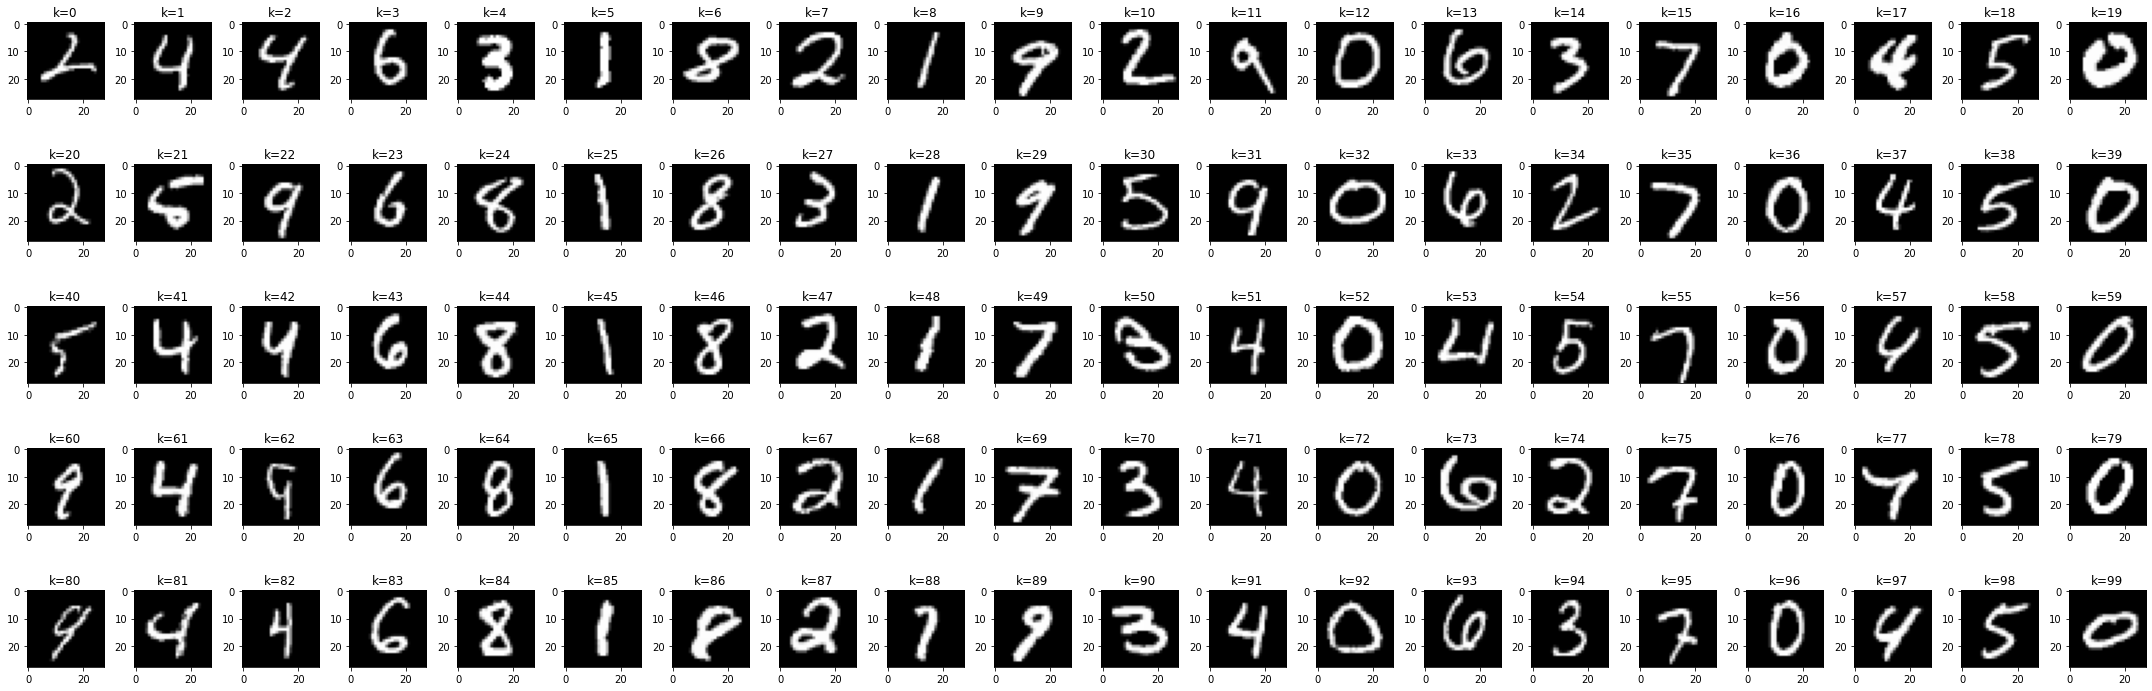

In [ ]:
samples_each = 5
num_col = num_groups
num_row = samples_each
num_samples = num_groups * samples_each


data_samples = []
for k in range(num_row * len(representatives)):
    ind = k // num_groups
    inds = np.where(np.array(assignments) == k % num_groups)
    data_samples.append(X2[inds[0][ind]])

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num_samples):
    ax = axes[i//num_col, i%num_col]
    if i % num_groups == 0:
        data_samples
    ax.imshow(data_samples[i].reshape(28, 28), cmap='gray')
    ax.set_title('k={}'.format(i))
plt.tight_layout()
plt.show()

*Each row shows the samples for each cluster that is represented by the data point we have visualized previously.
We can see that the samples look similar to corresponding repsentative sample!*

### As a result, for this homework, we found that $K$-means is a good clustering method if a good initialization of $K$ representatives are given like $K$-means++.